In [1]:
%matplotlib inline

import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib as plt
import numpy as np
import psycopg2
from pydataset import data
import matplotlib.pyplot as plt
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Float, Integer, String, Date
from sqlalchemy.ext.declarative import declarative_base
from matplotlib.ticker import StrMethodFormatter

In [2]:
conn = psycopg2.connect("dbname=sql_challenge user=postgres password=R31n33nj! host=localhost")

In [3]:
cur = conn.cursor()

In [4]:
#Read employee data
employees = pd.read_sql("SELECT * FROM employees", conn, parse_dates=['birth_date', 'hire_dates'])
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [5]:
#Read salary data
salaries = pd.read_sql("SELECT * FROM salaries", conn, parse_dates=['from_date', 'to_date'])
salaries

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
...,...,...,...,...
300019,499995,40000,1997-06-02,1998-06-02
300020,499996,58058,1996-05-13,1997-05-13
300021,499997,49597,1987-08-30,1988-08-29
300022,499998,40000,1993-12-27,1994-12-27


In [6]:
#2. Create a histogram to visualize the most common salary ranges for employees.
avg_salary = employees.merge(salaries, on ='emp_no')
avg_salary

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828,1996-08-03,1997-08-03
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,40006,1995-12-03,1996-12-02
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,1986-12-01,1987-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,78228,1989-09-12,1990-09-12
...,...,...,...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,40000,1997-06-02,1998-06-02
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27,58058,1996-05-13,1997-05-13
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,49597,1987-08-30,1988-08-29
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,40000,1993-12-27,1994-12-27


In [7]:
data = pd.DataFrame(avg_salary['emp_no'], avg_salary['salary'])
data

,emp_no
salary,
60117,70118
65828,75829
40006,50007
40054,50055
78228,88229
...,...
40000,50001
58058,68059
49597,59598


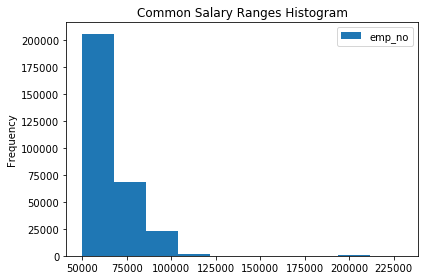

In [8]:
data.plot.hist(bins=10, title="Common Salary Ranges Histogram")
plt.tight_layout()
plt.show()

In [9]:
#Read title data
titles = pd.read_sql("SELECT * FROM titles", conn, parse_dates=['from_date', 'to_date'])
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,NaT
443305,499998,Senior Staff,1998-12-27,NaT
443306,499998,Staff,1993-12-27,1998-12-27


In [10]:
#3. Create a bar chart of average salary by title.
employees_salary = titles.merge(salaries, on ='emp_no')
employees_salary

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,NaT,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,NaT,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,NaT,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,NaT,40054,1986-12-01,1987-12-01
...,...,...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,49597,1987-08-30,1988-08-29
443304,499997,Senior Engineer,1992-08-29,NaT,49597,1987-08-30,1988-08-29
443305,499998,Senior Staff,1998-12-27,NaT,40000,1993-12-27,1994-12-27
443306,499998,Staff,1993-12-27,1998-12-27,40000,1993-12-27,1994-12-27


In [11]:
data2 = pd.DataFrame(employees_salary['salary'], employees_salary['title'])
data2

,salary
title,
Senior Engineer,NaN
Staff,NaN
Senior Engineer,NaN
Engineer,NaN
Senior Engineer,NaN
...,...
Engineer,NaN
Senior Engineer,NaN
Senior Staff,NaN


In [ ]:
#Bar chart
labels = ['salary']
x_axis = ['title']
plt.bar(x_axis, labels, color='r', alpha=0.5, align="center")
plt.show()